# Lista 1 - Cálculo Numérico

In [2]:
import numpy as np

**1. Mostre que 0.1 na base 10 é representado por 0.0001100110011... na base 2.**

Para converter um número decimal em binário, utilizaremos o seguinte algoritmo:
<ol>
    <li> Multiplique por 2 </li>
    <li> Pegue o decimal como dígito </li>
    <li> Pegue a fração como início da próxima etapa </li>
    <li> Repita  </li>
    <li> Guarde os número calculados em uma lista </li>
</ol>

Exemplo:<br>
<pre>0.1 * 2 = 0.2 -> 0
0.2 * 2 = 0.4 -> 0
0.4 * 2 = 0.8 -> 0
0.8 * 2 = 1.6 -> 1
0.6 * 2 = 1.2 -> 1
0.2 * 2 = 0.4 -> 0
0.4 * 2 = 0.8 -> 0
0.8 * 2 = 1.6 -> 1
0.6 * 2 = 1.2 -> 1</pre>

Resultado: 000110011

In [3]:
def frac_to_binary(input, max_iterations=1000, li=[]):
    # Repita por max_iterations interações
    for i in range(0, max_iterations):
        # Multiplque por 2
        input = input * 2
        # Pegue decimal como dígito
        digit = int(str(input)[:1])
        # Desconsidere erro flutuante
        if input >= 1:
            input = float(str(input - digit)[:3])
        # Guarde dígito numa lista
        li.append(digit)
    # Transforme lista em string
    return '0.'+''.join([ "%d"%x for x in li])
        
bi = frac_to_binary(0.1)
print(bi)

0.00011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000110001100011000

**2. Some 10000 vezes no computador o valor 0.0001 e imprima o resultado com sete decimais (precisão simples).**

In [4]:
n = np.float32(0.0001)
for i in range(0, 10000):
    n+=np.float32(0.0001)
print("{:.7f}".format(n))

1.0001535


**3. Calcule no computador o maior $ n! $ possível até causar overflow (precisão simples e dupla). Imprima $ n $ e $ n! $.**

Precisão simples:

In [6]:
def fac32(max_iterations, fac=1):
    for i in range (1, max_iterations):
        fac = i * np.float32(fac)
        if fac == np.inf:
            print('Overflow na iteração número {:.0f}. Valor: {:.0f}'.format(i, fac))
            break

fac32(100)

Overflow na iteração número 36. Valor: inf


Precisão dupla:

In [5]:
def fac64(max_iterations, fac=1):
    for i in range (1, max_iterations):
        fac = i * np.float64(fac)
        if fac == np.inf:
            print('Overflow na iteração número {:.0f}. Valor: {:.0f}'.format(i, fac))
            break

fac64(1000)

Overflow na iteração número 171. Valor: inf


<ipython-input-5-d2988d16b356>:3: RuntimeWarning: overflow encountered in double_scalars
  fac = i * np.float64(fac)


**4. Calcule com uma calculadora não programável a raiz positiva de $x² - 5 = 0$ usando o método de bissecção, até o intervalo ser $\leq$ 0.0001**

Por diversão, vou criar um algoritmo do método de bissecção, e testar na função $f(x) = x^2 - 5$, no intervalo $[1, 4]$ (sendo $f(1)=-4$, $f(4) = 11$. Devo encontrar a raiz $2,236$.

Método de bissecção: <br>
 - Encontrar $c = (a+b)/2$
 - Verificar $f(a) . f(c) < 0$
 - Se sim, existe raiz em $(a, c)$
 - Caso contrário, existe raiz em $[c, b)$
 - Repetir até $c \leq \epsilon $

In [7]:
def squared_f(x):
    return x**2-5

def bissec(f, a, b, epsilon = 0.0001):
    '''Passe f como função; a e b são reais de extremos do intervalo. Epsilon é o intervalo limite.'''
    
    if f(a)*f(b)>0:
        raise Exception('Por favor, passe parâmetros t. q. f(a)*f(b)<0')
    c = a
    while(b-a >= epsilon):
        c = (a+b)/2
        if f(c)*f(a)<0:
            b = c
        else:
            a = c
            
    return c

r = bissec(squared_f, 1, 4)
print('Raiz encontrada: {:.3f}'.format(r))

Raiz encontrada: 2.236


Por curiosidade, vou testar a função $f(x) = \frac{x^3}{e^x} - x + ln(x) + 1$, no intervalo $[0, 2]$. Devo encontrar a raiz $0.593$.

In [8]:
def weird_function(x):
    return ((x**3/np.exp(x)) - x + np.log(x) + 1)

r = bissec(weird_function, 0, 2)
print('Raiz encontrada: {:.3f}'.format(r))

Raiz encontrada: 0.593


<ipython-input-8-7545cd435c37>:2: RuntimeWarning: divide by zero encountered in log
  return ((x**3/np.exp(x)) - x + np.log(x) + 1)


**5. A eq. $x^2 - 3x + 2 = 0$ pode ser escrita como $x=G(x)$ em diversas formas para aplicação do método de substituições sucessivas. Determine analiticamente a região de convergência para as raízes $x=1,2$ e faça os gráficos de convergência $y=G(x)$ superposto à reta $y=x$ para os seguintes casos:** <br>

**a) $x_{n+1} = (x^2_n + 2) / 3$** <br>
**b) $x_{n+1} = \sqrt{3 x_n - 2}$**

*Determinar analiticamente a região de convergência para $1,2$:*

(a) Se $x_{n+1} = (x_n^2 + 2)/3$, então temos $x = G(x) = \frac{x^2+2}{3}$. <br>
Para termos uma região de convergência, é necessário que $|G'(x)| < 1$, onde $G'(x) = \frac{2x}{3}$. <br>
Então, temos $|\frac{2x}{3}|<1 \Rightarrow |x| < \frac{3}{2}$, que é nossa região de covergência.

(b) Se $x_{n+1} = \sqrt{3 x_n - 2}$, então temos $x = H(x) = \sqrt{3x - 2}$. <br>
Para termos uma região de convergência, é necessário que $|H'(x)| < 1$, onde $H'(x) = \frac{3}{2 \sqrt{3x-2}}$. <br>
Então, temos $|\frac{3}{2 \sqrt{3x-2}}|<1 \Rightarrow \frac{9}{12x-8}<1 \Rightarrow 9<12x-8 \Rightarrow \frac{17}{12} < x$, que é nossa região de convergência.

*Gráfico de convergência $y = G(x)$ superposto à reta $y=x$:*

In [9]:
def g_x(x):
    return (x**2+2)/3

def h_x(x):
    return np.sqrt(3*x-2)

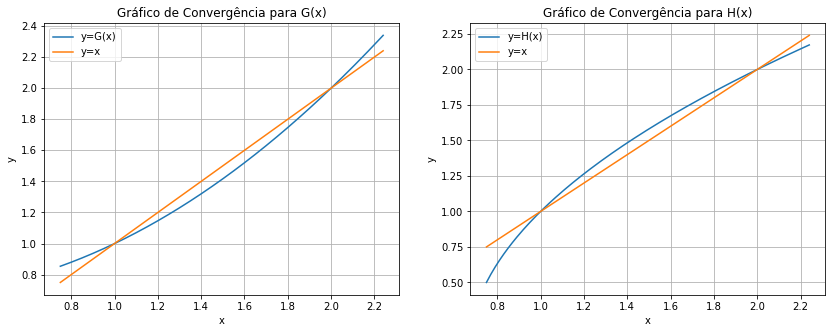

In [10]:
import matplotlib.pyplot as plt

x = np.arange(0.75,2.25, step=0.01)
l = np.arange(0.75,2.25, step=0.01)
y_1 = [g_x(i) for i in x]
y_2 = [h_x(i) for i in x]

f = plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(x,y_1, label='y=G(x)')
plt.plot(x,l, label='y=x')
plt.grid()
plt.legend()
plt.title('Gráfico de Convergência para G(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.plot(x,y_2, label='y=H(x)')
plt.plot(x,l, label='y=x')
plt.grid()
plt.legend()
plt.title('Gráfico de Convergência para H(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Montar algoritmo:

In [11]:
def subs_suc(f, x_0, epsilon=10e-100):
    '''f é função, x_0 é chute inicial'''
    e = np.inf
    while e > epsilon:
        x = f(x_0)
        e = x-x_0
        x_0 = x
    return x

r = subs_suc(g_x, 0)
print('Raiz encontrada para (x²+2)/3: {:.0f}'.format(r))

Raiz encontrada para (x²+2)/3: 1


**6. Com uma calculadora não programável, encontre a raiz posivita de $sin(x)=x/2$ usando os métodos de Newton-Raphson e secantes, com erro $\epsilon \leq 10^{-4}$**

Novamente, por curiosidade vou montar o algoritmo. Resultado esperado para a raiz: $3.14159265359$.

*Utilizando método de Newton-Raphson:*

Temos $f(x)=\frac{2sin(x)}{x}$, $f'(x)=2 \frac{x cos(x) - sin(x)}{x^2}$

Qual o $x_0$ próximo de $a$ (raiz)? Utilizar método de bissecção para descobrir

In [12]:
def f(x):
    return (2*np.sin(x))/(x)

print('A raiz está próxima de {:.10f}'.format(bissec(f, 1, 10)))

A raiz está próxima de 3.1415786743


Aplicar método de Newton-Raphson:

In [13]:
def df(x):
    return 2*((x*np.cos(x)-np.sin(x))/(x**2))

def newton_raphson(f, df, x_0, epsilon=1e-4):
    xn = x_0
    e = np.inf
    while e >= epsilon:
        xnp1 = xn - f(xn)/df(xn)
        e = np.abs((xnp1-xn)/(xn))
        xn = xnp1
    return xnp1

print('Raiz encontrada: {:.10f}'.format(newton_raphson(f, df, 3.1415786743)))

Raiz encontrada: 3.1415926535


Utilizamos o método de bissecção para encontrar uma boa aproximação para a raiz, e então utilizamos Newton-Raphson para "polir" este resultado.

*Utilizando o método de secantes:*

Já utilizamos o método de bissecção e sabemos que a raiz se encontra próximo de $3.1415786743$. Neste método, nossa raiz estará no intervalo deste número $\pm1.618$, que é a razão áurea.

In [14]:
def secante(f, x_n, xnm1, n_it=10**5):
    '''f é uma função \n
    x_n e xnm1 pontos tal que a raiz esteja em (xnm1, x_n) \n
    n_it é o número de iterações'''
    
    for i in range(n_it):
        xnp1 = x_n - ((x_n-xnm1)*f(x_n))/(f(x_n)-f(xnm1))
        x_n = xnp1
    return x_n

print('Raiz encontrada: {:.10f}'.format(secante(f, 
                                                3.1415786743+1.618, 
                                                3.1415786743-1.618)))

Raiz encontrada: 3.1415926536


**7. Considere o sistema na forma $Ax=b$ dado por** 
<center>
$\left[\begin{array}{ccc}
1 & 2 & 3\\
2 & 4 & -2\\
1 & 3 & -1\\
\end{array}\right]$
$\left[\begin{array}{ccc}
x_1\\
x_2\\
x_3\\
\end{array}\right]$
=
$\left[\begin{array}{ccc}
14\\
4\\
4\\
\end{array}\right]$
</center>

**a) Resolva o sistema pelo método de Eliminação de Gauss. use o pivotamento parcial se necessário.** \
**b) A partir da matriz triangular superior calcule o determinante da matriz $A$.** \
**c) Inverta a matriz $A$ pelo método de Eliminação de Gauss.**

Fazer matriz:

In [15]:
m = [[1, 2, 3, 14], 
     [2, 4, -2, 4],
    [1, 3, -1, 4]]
print(np.array(m).reshape(3,4))

[[ 1  2  3 14]
 [ 2  4 -2  4]
 [ 1  3 -1  4]]


Aplicar Eliminação de Gauss:

In [16]:
# Definir operações

def soma(linha1, linha2, k=1):
    '''Soma linha 1 por linha 2. K é uma constante para multiplicar com a linha 2.'''
    return [linha1[i] + k*linha2[i] for i in range(len(linha1))]

def escalar(linha, escalar):
    '''Multiplica linha por escalar'''
    return [linha[i]*escalar for i in range(len(linha))]

def troca(m, pos1, pos2):
    '''Troca linhas de posição. m é a matriz-alvo, pos1 e pos2 os índices de troca.'''
    mg = m[pos1]
    m[pos1] = m[pos2]
    m[pos2] = mg
    return m

In [17]:
m = troca(m, 1, 2)
m[1] = soma(m[1], m[0], k=-1)
m[2] = soma(m[2], m[0], k=-2)
m[2] = escalar(m[2], -1/8)

print('Matrix obtida: \n',np.array(m).reshape(3, 4))

Matrix obtida: 
 [[  1.   2.   3.  14.]
 [  0.   1.  -4. -10.]
 [ -0.  -0.   1.   3.]]


Temos então $x_3=3$. <br>
Portanto, $x_2 -4x_3 = -10 \Rightarrow x_2 = 2$, <br>
e $x_1 +2x_2 +3x_3 = 14 \Rightarrow x_1 = 1$

Montar algoritmo:

In [18]:
def gauss(M):
    # Número de colunas
    cols = len(M)

    # Para cada coluna...
    for i in range(0, cols):
        el_max = abs(M[i][i]) #Elemento da Diagonal
        lin_max = i #Linha atual
        # Pra cada linha abaixo...
        for k in range(i + 1, cols):
            # Se o elemento atual for maior que a diagonal...
            if abs(M[k][i]) > el_max:
                el_max = abs(M[k][i]) # Atualiza elemento máximo
                lin_max = k # Atualiza linha

        # Trocar linha máxima por linha atual
        for k in range(i, cols + 1):
            tmp = M[lin_max][k]
            M[lin_max][k] = M[i][k]
            M[i][k] = tmp

        # Transformar colunas abaixo desta em zero
        # Pra cada linha abaixo...
        for k in range(i + 1, cols):
            # Dividir pela diagonal != 0
            c = -M[k][i] / M[i][i]
            # Pra cada linha...
            for j in range(i, cols + 1):
                # Se linha = coluna
                if i == j:
                    M[k][j] = 0
                    # Se não, somar e multiplicar por escalar
                else:
                    M[k][j] += c * M[i][j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(cols)]
    for i in range(cols - 1, -1, -1):
        x[i] = M[i][cols] / M[i][i]
        for k in range(i - 1, -1, -1):
            M[k][cols] -= M[k][i] * x[i]
    return x

r = gauss(m)
print('Resultados: \nx_1 = {:.0f} \nx_2 = {:.0f} \nx_3 = {:.0f}'.format(r[0], r[1], r[2]))

Resultados: 
x_1 = 1 
x_2 = 2 
x_3 = 3


**8. Seja o sistema $Ax=b$ na forma**
<center>
$\left[\begin{array}{ccc}
-1 & 4 & -3\\
-5 & -3 & 8\\
-6 & 2 & 3\\
\end{array}\right]$
$\left[\begin{array}{ccc}
x_1\\
x_2\\
x_3\\
\end{array}\right]$
=
$\left[\begin{array}{ccc}
4\\
-3\\
3\\
\end{array}\right]$
</center>

**a) A matrix $A$ satisfaz o Critério das Linhas para alguma permutação de linhas?** \
**b) A matriz $A$ tem alguma permutação que satisfaz o Critério de Sassenfeld?** \
**c) Escreva as equações de recorrência do método de Gauss-Seidel e calcule uma iteração a partir de $x^{(0)}=(1,0,0)$.**

**9. Sejam os pontos $(-1,-11), (1,5), (2,13), (3,-13)$.** \
**a) Escreva a expressão do polinômio interpolante $y=P_3 (x)$ usando o método de Lagrange para os pontos dados.** \
**b) Construa um programa em C (ou C++, FORTRAN, Python) que calcule o valor de $y$ dado $x=1,5$ usando o polinômio interpolante do item a). Bastam dois *loops*, um interno para o produtório e outro externo para o somatório**.